In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


### Data Exploration

In [2]:

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df["Churn"].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# print(df["gender"].unique()) # Female/Male
# print(df["SeniorCitizen"].unique()) # Yes/No (0/1)
# print(df["Partner"].unique()) # Yes/No
# print(df["Dependents"].unique()) # Yes/No
# print(df["tenure"].unique()) # int probably months
# print(df["PhoneService"].unique()) # Yes/No
# print(df["MultipleLines"].unique()) # Yes/No/No phone service
# print(df["InternetService"].unique()) # DSL/Fiber optic/No
# print(df["OnlineSecurity"].unique()) # Yes/No/No internet service
# print(df["OnlineBackup"].unique()) # Yes/No/No internet service
# print(df["DeviceProtection"].unique()) # Yes/No/No internet service
# print(df["TechSupport"].unique()) # Yes/No/No internet service
# print(df["StreamingTV"].unique()) # Yes/No/No internet service
# print(df["StreamingMovies"].unique()) # Yes/No/No internet service
# print(df["Contract"].unique()) # MonthToMonth/OneYear/TwoYear
# print(df["PaperlessBilling"].unique()) # Yes/No
# print(df["PaymentMethod"].unique()) # 'Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'
# print(df["MonthlyCharges"].unique()) # floats
# print(df["TotalCharges"].unique()) # floats
print(df["Churn"].unique()) # Yes/No

['No' 'Yes']


Male      3555
Female    3488
Name: gender, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64


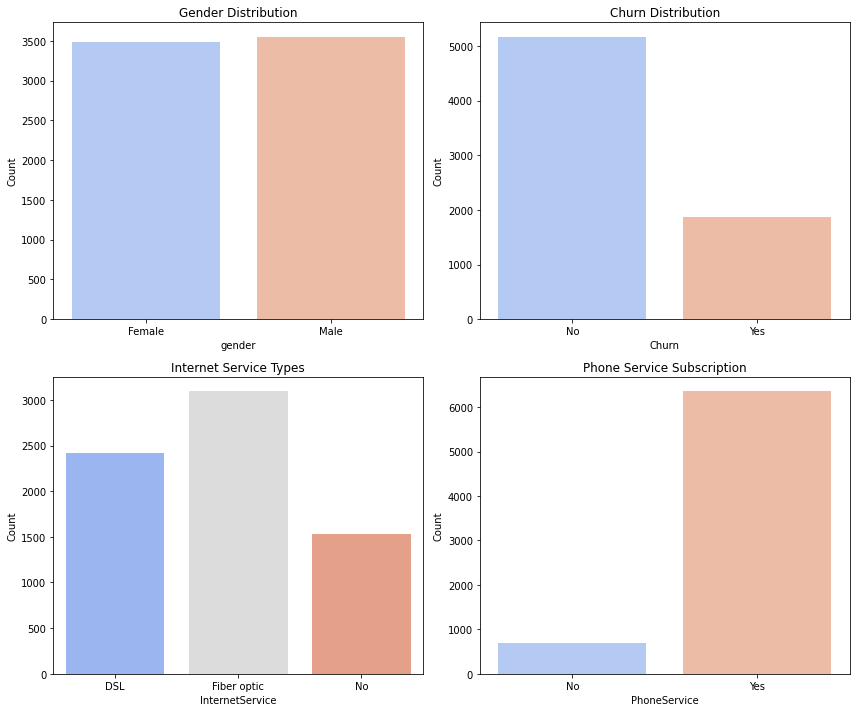

In [8]:

print(df["gender"].value_counts())
print(df["Churn"].value_counts())
print(df["InternetService"].value_counts())
print(df["PhoneService"].value_counts())

# Set up a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define categories for plots
categories = ["gender", "Churn", "InternetService", "PhoneService"]
titles = ["Gender Distribution", "Churn Distribution", "Internet Service Types", "Phone Service Subscription"]

# Generate bar plots
for ax, cat, title in zip(axes.flat, categories, titles):
    sns.countplot(x=df[cat], ax=ax, palette="coolwarm", hue=df[cat])
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.set_xlabel(cat)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


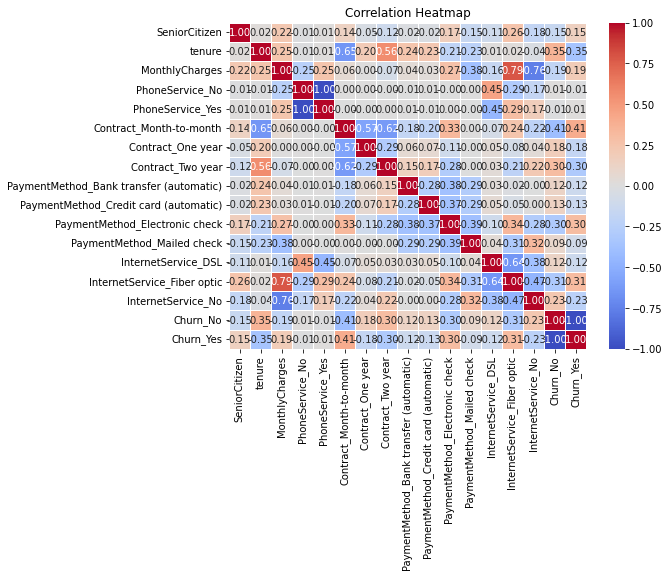

In [10]:
corr = pd.get_dummies(df[["SeniorCitizen","PhoneService", "Contract", "tenure", "MonthlyCharges", "PaymentMethod", "InternetService", "Churn"]]).corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

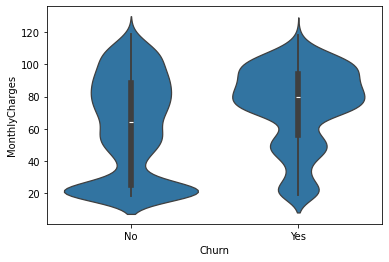

In [11]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

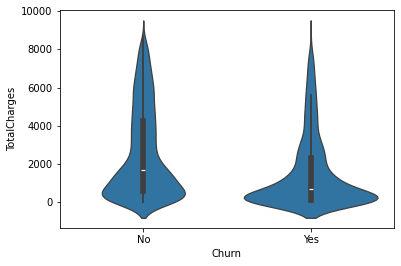

In [12]:
sns.violinplot(x="Churn", y="TotalCharges", data=df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

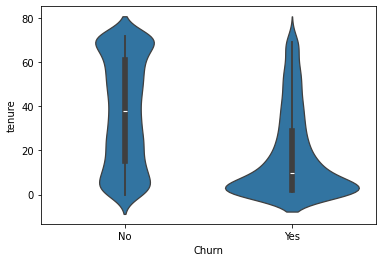

In [13]:
sns.violinplot(x="Churn", y="tenure", data=df)

### Data Manipulation

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df[np.isnan(df['TotalCharges'])]

# tenure and Charges are 0/empty let's drop these 11 customers

df.dropna(subset=['TotalCharges'], inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

### Preprocessing

In [17]:

scaler = StandardScaler()

numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [18]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [19]:
col_to_drop = ["customerID", "gender", "PhoneService", "MultipleLines", "StreamingTV", "StreamingMovies"]
df = df.drop(columns = col_to_drop)

In [20]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
y

array([0, 0, 1, ..., 0, 1, 0])

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, stratify=y) # stratify is preserving the distribution


In [22]:
from sklearn.utils import resample

# Combine X_train and y_train into one dataframe
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Churn'] == 0]
minority_class = train_data[train_data['Churn'] == 1]

# Resample minority class
minority_upsampled = resample(minority_class,
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class),  # Match majority class size
                              random_state=42)

# Combine majority class with upsampled minority class
train_data_upsampled = pd.concat([majority_class, minority_upsampled])

# Separate back into X and y
X_train = train_data_upsampled.drop('Churn', axis=1)
y_train = train_data_upsampled['Churn']


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_y = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print(classification_report(y_test,lr_y))


Logistic Regression accuracy is : 0.8031272210376688
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



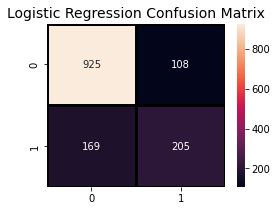

In [ ]:


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()



KNN Classifier

In [ ]:


# Test a range of n_neighbors values
neighbors = [1, 3, 5, 11, 21, 50, 100, 200, 500]
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    print(f"n_neighbors={n}, Mean Accuracy={scores.mean()}")


n_neighbors=1, Mean Accuracy=0.7233777777777778
n_neighbors=3, Mean Accuracy=0.7482666666666666
n_neighbors=5, Mean Accuracy=0.7644444444444446
n_neighbors=11, Mean Accuracy=0.7841777777777776
n_neighbors=21, Mean Accuracy=0.7832888888888889
n_neighbors=50, Mean Accuracy=0.7911111111111111
n_neighbors=100, Mean Accuracy=0.7923555555555556
n_neighbors=200, Mean Accuracy=0.7930666666666667
n_neighbors=500, Mean Accuracy=0.7813333333333332


In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=200)
knn_model.fit(X_train,y_train)
knn_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy is :",accuracy_knn)

print(classification_report(y_test, knn_y))



              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



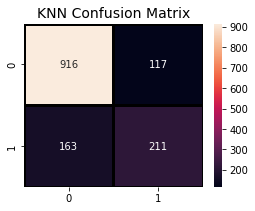

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Confusion Matrix",fontsize=14)
plt.show()

SVC

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

print(classification_report(y_test, svc_y))

SVM accuracy is : 0.8031272210376688
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1033
           1       0.69      0.47      0.56       374

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



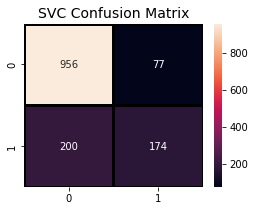

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVC Confusion Matrix",fontsize=14)
plt.show()

Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, dt_y))

Decision Tree accuracy is : 0.7370291400142146
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1033
           1       0.51      0.53      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



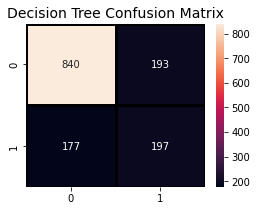

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

Random Forest Classifier

In [ ]:


rf_model = RandomForestClassifier(n_estimators = 500 , oob_score = True, n_jobs = -1,
                                  random_state = 50, max_features = "sqrt",
                                  max_leaf_nodes = 30)

rf_model.fit(X_train, y_train)
rf_y = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_y)
print(accuracy_rf)

print(classification_report(y_test, rf_y))

0.8137882018479033
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1033
           1       0.71      0.50      0.59       374

    accuracy                           0.81      1407
   macro avg       0.78      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



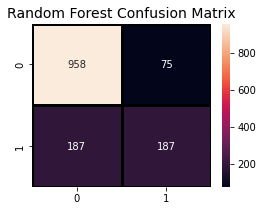

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()


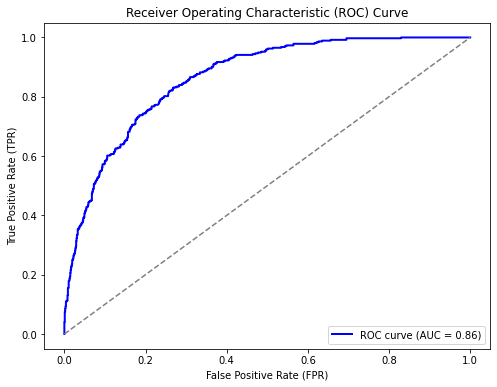

In [ ]:

y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class=1)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AdaBoost

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_y = ada_model.predict(X_test)
print(accuracy_score(y_test, ada_y))
print(classification_report(y_test, ada_y))


0.806680881307747
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



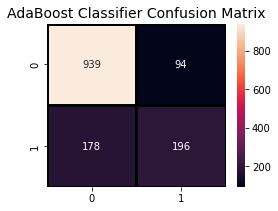

In [ ]:

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ada_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()



In [ ]:


gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y = gb.predict(X_test)
print(accuracy_score(y_test, gb_y))
print(classification_report(y_test, gb_y))


0.806680881307747
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



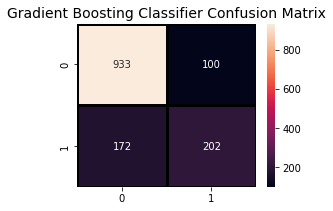

In [ ]:

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [ ]:


from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
clf4 = RandomForestClassifier(n_estimators = 500 , oob_score = True, n_jobs = -1,
                                  random_state = 50, max_features = "sqrt",
                                  max_leaf_nodes = 30, class_weight="balanced")
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3) , ('rfc', clf4)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.814498933901919
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.53      0.60       374

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.81      0.81      1407



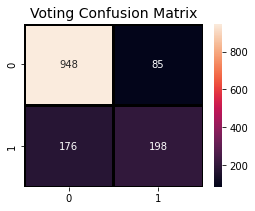

In [ ]:

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Voting Confusion Matrix",fontsize=14)
plt.show()

